In [ ]:
# day15_coffee machine_240704
#Setup Local Development Environment & Coffee Machine Project
#IDE: Integrated Development Environment
#PyCharm
# Metrits of PyCharm
# - Spell Check
# - More space
# - Built in Linter
# PEP8_style guide
# - Local history
# - View structure
# - Refactor Rename

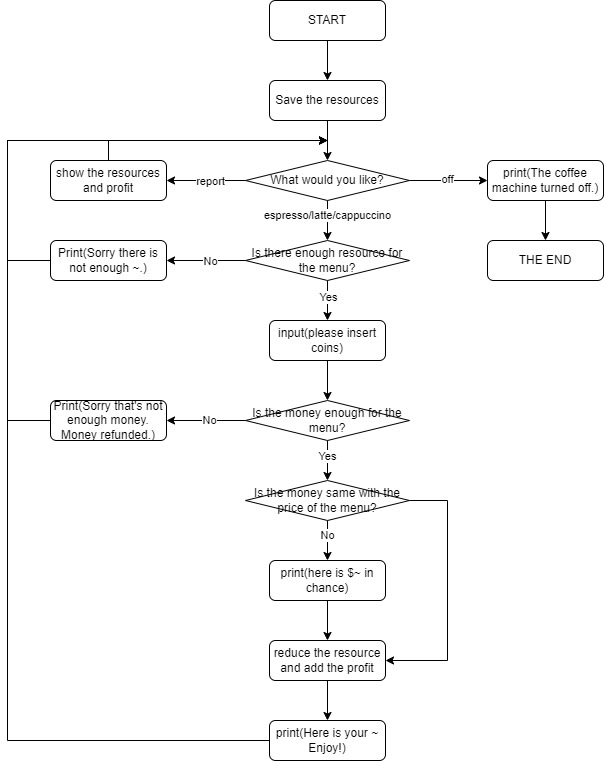

In [1]:
# day15 final project: Coffee machine _flowchart
from PIL import Image
from IPython.display import display
img = Image.open('day15_flowchart.jpg')
display(img)

In [2]:
# day15 final project: Coffee machine _240704
MENU = {
    "espresso": {
        "ingredients": {
            "water": 50,
            "milk": 0,
            "coffee": 18,
        },
        "cost": 1.5,
    },
    "latte": {
        "ingredients": {
            "water": 200,
            "milk": 150,
            "coffee": 24,
        },
        "cost": 2.5,
    },
    "cappuccino": {
        "ingredients": {
            "water": 250,
            "milk": 100,
            "coffee": 24,
        },
        "cost": 3.0,
    }
}

profit = 0
resources = {
    "water": 300,
    "milk": 200,
    "coffee": 100,
}

lack_resources = []

def enough_resources(res, choi):
    global lack_resources
    if (res["water"] >= MENU[choi]["ingredients"]["water"]) and (res["milk"] >= MENU[choi]["ingredients"]["milk"]) and (res["coffee"] >= MENU[choi]["ingredients"]["coffee"]):
        return True
    if res["water"] < MENU[choi]["ingredients"]["water"]:
        lack_resources.append("water")
    if res["milk"] < MENU[choi]["ingredients"]["milk"]:
        lack_resources.append("milk")
    if res["coffee"] < MENU[choi]["ingredients"]["coffee"]:
        lack_resources.append("coffee")


def money_cal(menu_choi):
    print("Please insert coins.")
    quarters = int(input("How many quarters?: "))
    dimes = int(input("How many dimes?: "))
    nickles = int(input("How many nickles?: "))
    pennies = int(input("How many nickels?: "))
    total_result = 0.25*quarters + 0.1*dimes + 0.05*nickles + 0.01*pennies
    total_result = round(total_result, 2)
    print(f"You inserted ${total_result}, and {menu_choi} is ${MENU[menu_choi]['cost']}")
    return total_result

def using_resources(res, choi):
    res["water"] = res["water"] - MENU[choi]["ingredients"]["water"]
    res["milk"] = res["milk"] - MENU[choi]["ingredients"]["milk"]
    res["coffee"] = res["coffee"] - MENU[choi]["ingredients"]["coffee"]


should_continue = True
while should_continue:
    choice = input("What would you like? (espresso/latte/cappuccino): ")

    # Case1. report
    if choice == "report":
        print(f"Water: {resources['water']}ml\nMilk: {resources['milk']}ml\nCoffee: {resources['coffee']}g\nMoney: ${profit}")

    # Case2. off
    elif choice == "off":
        should_continue = False
        print("The coffee machine turned off.")

    # Case3. menu
    else:
        # Case3-1. menu & enough resources
        if enough_resources(resources, choice):
            total_money = money_cal(choice)
            # Case3-1-1. menu & enough resources & enough money
            if total_money >= MENU[choice]["cost"]:
                if total_money > MENU[choice]["cost"]:
                    change = round(total_money-MENU[choice]['cost'], 2)
                    print(f"Here is ${change} in change.")
                using_resources(resources, choice)
                profit += MENU[choice]["cost"]
                print(f"Here is your {choice} Enjoy!")
            # Case3-1-2. menu & enough resources & not enough money
            else:
                print("Sorry that's not enough money. Money refunded.")

        # Case3-2. menu & not enough resources
        else:
            print(f"Sorry, there is not enough {', '.join(lack_resources)}.")

What would you like? (espresso/latte/cappuccino):  report


Water: 300ml
Milk: 200ml
Coffee: 100g
Money: $0


What would you like? (espresso/latte/cappuccino):  espresso


Please insert coins.


How many quarters?:  6
How many dimes?:  7
How many nickles?:  8
How many nickels?:  6


You inserted $2.66, and espresso is $1.5
Here is $1.16 in change.
Here is your espresso Enjoy!


What would you like? (espresso/latte/cappuccino):  latte


Please insert coins.


How many quarters?:  4
How many dimes?:  5
How many nickles?:  3
How many nickels?:  2


You inserted $1.67, and latte is $2.5
Sorry that's not enough money. Money refunded.


What would you like? (espresso/latte/cappuccino):  latte


Please insert coins.


How many quarters?:  9
How many dimes?:  8
How many nickles?:  9
How many nickels?:  8


You inserted $3.58, and latte is $2.5
Here is $1.08 in change.
Here is your latte Enjoy!


What would you like? (espresso/latte/cappuccino):  report


Water: 50ml
Milk: 50ml
Coffee: 58g
Money: $4.0


What would you like? (espresso/latte/cappuccino):  cappuccino


Sorry, there is not enough water, milk.


What would you like? (espresso/latte/cappuccino):  off


The coffee machine turned off.


In [8]:
# day15 final project: Coffee machine _teacher solution
MENU = {
    "espresso": {
        "ingredients": {
            "water": 50,
            "coffee": 18,
        },
        "cost": 1.5,
    },
    "latte": {
        "ingredients": {
            "water": 200,
            "milk": 150,
            "coffee": 24,
        },
        "cost": 2.5,
    },
    "cappuccino": {
        "ingredients": {
            "water": 250,
            "milk": 100,
            "coffee": 24,
        },
        "cost": 3.0,
    }
}

profit = 0
resources = {
    "water": 300,
    "milk": 200,
    "coffee": 100,
}

def is_resource_sufficient(order_ingredients):
    """Returns True when order can be made, False if ingredients are insufficient."""
    for item in order_ingredients:
        if order_ingredients[item] > resources[item]:
            print(f"Sorry there is not enough {item}.")
            return False
    return True

def process_coins():
    """Returns the total calculated from coins inserted."""
    print("Please insert coins.")
    total = int(input("how many quarters?: "))*0.25
    total += int(input("how many dimes?: "))*0.1
    total += int(input("how many nickles?: "))*0.05
    total += int(input("how many pennies?: "))*0.01
    return total

def is_transaction_successful(money_received, drink_cost):
    """Return True when the payment is accepted, or False if money is insufficient."""
    if money_received >= drink_cost:
        change = round(money_received - drink_cost, 2)
        print(f"Here is ${change} in change.")
        global profit
        profit += drink_cost
        return True
    else:
        print("Sorry that's not enough money. Money refunded.")
        return False

def make_coffee(drink_name, order_ingredients):
    """Deduct the required ingredients from the resources."""
    for item in order_ingredients:
        resources[item] -= order_ingredients[item]
    print(f"Here is your {drink_name}. Enjoy!")

is_on = True

while is_on:
    choice = input("What would you like? (espresso/latte/cappuccino): ")
    if choice == "off":
        is_on = False
    elif choice == "report":
        print(f"Water: {resources['water']}ml")
        print(f"Milk: {resources['milk']}ml")
        print(f"Coffee: {resources['coffee']}g")
        print(f"Money: ${profit}")
    else:
        drink = MENU[choice]
        if is_resource_sufficient(drink["ingredients"]):
            payment = process_coins()
            if is_transaction_successful(payment, drink["cost"]):
                make_coffee(choice, drink["ingredients"])

# reflection
# I made 3 functions and teacher made 4 functions. The difference is 'is_transaction_successful' function. The reason why I didn't make this function was that when the inserted coin amount and the price are same, it doesn't need to print change. In personal thinking, my way is more precious than teachers' one.
# well done to divide 3 cases, used round function.
# One problem of the teacher's solution code is that the 'is_resource_sufficient' fuction only presents one insufficient item even there could be some scenarios like 2 items are insufficient.
# In my code, all cases with the insufficient items are regarded.

What would you like? (espresso/latte/cappuccino):  report


Water: 300ml
Milk: 200ml
Coffee: 100g
Money: $0


What would you like? (espresso/latte/cappuccino):  espresso


Please insert coins.


how many quarters?:  9
how many dimes?:  8
how many nickles?:  9
how many pennies?:  6


Here is $2.06 in change.
Here is your espresso. Enjoy!


What would you like? (espresso/latte/cappuccino):  report


Water: 250ml
Milk: 200ml
Coffee: 82g
Money: $1.5


What would you like? (espresso/latte/cappuccino):  latte


Please insert coins.


how many quarters?:  9
how many dimes?:  9
how many nickles?:  9
how many pennies?:  9


Here is $1.19 in change.
Here is your latte. Enjoy!


What would you like? (espresso/latte/cappuccino):  latte


Sorry there is not enough water.


What would you like? (espresso/latte/cappuccino):  cappuccino


Sorry there is not enough water.


What would you like? (espresso/latte/cappuccino):  espresso


Please insert coins.


how many quarters?:  9
how many dimes?:  4
how many nickles?:  5
how many pennies?:  9


Here is $1.49 in change.
Here is your espresso. Enjoy!


What would you like? (espresso/latte/cappuccino):  report


Water: 0ml
Milk: 50ml
Coffee: 40g
Money: $5.5


What would you like? (espresso/latte/cappuccino):  latte


Sorry there is not enough water.


What would you like? (espresso/latte/cappuccino):  off
